## Objective: The objective of this assignment is to assess students' understanding of batch normalization in artificial neural networks (ANN) and its impact on training performance.

## Q1. Theory and Concepts
## 1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

`Batch normalization` is a technique used in artificial neural networks to improve the training process and stability of the network. It normalizes the intermediate activations of the network by adjusting and rescaling them to have zero mean and unit variance.

The concept of `batch normalization` revolves around the observation that the distribution of the input data changes as it propagates through the layers of a neural network during training. This phenomenon is known as the internal covariate shift. The change in distribution can make it difficult for subsequent layers to adapt and learn effectively. Batch normalization aims to alleviate this problem by normalizing the inputs within each mini-batch.

The process of batch normalization involves the following steps:

1. During the forward pass, for each mini-batch of training examples, the mean and variance of the activations in that batch are computed.

2. The activations are then normalized by subtracting the batch mean and dividing by the square root of the batch variance. This step ensures that the normalized activations have a mean of zero and a variance of one.

3. After normalization, the activations are rescaled using learnable parameters called scale and shift parameters. These parameters allow the network to learn the optimal scale and shift for each normalized activation, which can be important for the representation power of the network.

4. Finally, the normalized and rescaled activations are passed through the activation function and forwarded to the next layer.

During the backward pass, the gradients are computed as if the batch normalization layer is not present. The gradients are then used to update the learnable parameters of the network, including the scale and shift parameters of the batch normalization layer.

`Batch normalization` offers several benefits in training neural networks:

1. It helps mitigate the internal covariate shift by normalizing the activations, leading to more stable and efficient training.

2. It can act as a regularizer by adding noise to the activations within each mini-batch, reducing the reliance on dropout or other regularization techniques.

3. It allows for higher learning rates, as the normalization helps to reduce the dependence of the gradients on the scale of the parameters.

4. It can accelerate the convergence of the network, enabling faster training and reducing the number of training iterations required.

Overall, batch normalization has become a widely used technique in neural network architectures, improving training stability, convergence, and generalization performance.

## 2. Describe the benefits of using batch normalization during training.

Batch normalization offers several benefits when used during the training of neural networks:

1. `Stabilizes training`: Batch normalization helps to stabilize the training process by addressing the issue of internal covariate shift. By normalizing the activations within each mini-batch, it reduces the shift in the distribution of the intermediate activations as the network trains. This stabilization allows for more effective and consistent learning, leading to faster convergence.

2. `Reduces sensitivity to initialization`: Batch normalization reduces the dependence of the network on the initial parameter values. Since the activations are normalized within each mini-batch, the network is less sensitive to the choice of initialization, making it easier to initialize the network parameters.

3. `Enables higher learning rates`: Normalizing the activations helps to keep the gradients within a reasonable range, even when using higher learning rates. This stability allows for more aggressive learning rates, which can lead to faster convergence and shorter training times.

4. `Acts as a regularizer`: Batch normalization introduces some noise to the activations within each mini-batch, similar to dropout. This noise acts as a regularizer and can help prevent overfitting. It reduces the reliance on other regularization techniques, such as dropout or L2 regularization, and can improve generalization performance.

5. `Improves gradient flow`: The normalization of activations helps to combat the vanishing or exploding gradient problem. By keeping the activations centered around zero and with a unit variance, it helps maintain a reasonable gradient flow through the layers of the network. This facilitates the backpropagation of gradients and improves the efficiency of weight updates.

6. `Enables faster convergence`: With the benefits of stabilization, reduced sensitivity to initialization, higher learning rates, and improved gradient flow, batch normalization can accelerate the convergence of the network. It reduces the number of training iterations required to reach a desired level of performance, thereby speeding up the training process.

It's worth noting that batch normalization is typically applied to the activations of hidden layers during training, but it's important to turn off batch normalization during inference or when using the network for prediction on individual examples. In such cases, the statistics of the entire dataset or a running average of the batch statistics are used for normalization to ensure consistent behavior

## 3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

`Batch normalization` operates by normalizing the intermediate activations within each mini-batch during the training of a neural network. The working principle involves two main steps: normalization and rescaling using learnable parameters.

1. `Normalization Step`: The normalization step involves calculating the mean and variance of the activations within each mini-batch and then normalizing the activations based on these statistics. The steps for normalization are as follows:

- a. Compute the mean (μ) and variance (σ^2) of the activations within the mini-batch. These values are computed for each channel (feature) independently.

- b. Normalize the activations by subtracting the mean and dividing by the square root of the variance. This ensures that the normalized activations have zero mean and unit variance.

- c. Optionally, a small constant (ε) may be added to the denominator to avoid division by zero.

The normalization step ensures that the activations within each mini-batch have a standardized distribution, which can improve the stability of the training process.

2. `Learnable Parameters`: After the normalization step, the normalized activations are rescaled using learnable parameters. The purpose of these parameters is to allow the network to learn the optimal scale and shift for the normalized activations. The rescaling is done as follows:

- a. Multiply the normalized activations by a learnable parameter called the "scale" parameter (γ). This parameter determines the standard deviation of the output activations.

- b. Add another learnable parameter called the "shift" parameter (β) to the scaled activations. This parameter determines the mean of the output activations.

- The scale and shift parameters are initially set to 1 and 0, respectively, but are learned during the training process through backpropagation and gradient descent. These parameters enable the network to adapt and control the distribution and scale of the activations.

By combining the normalization step and the learnable parameters, batch normalization normalizes the activations within each mini-batch to have zero mean and unit variance, and then allows the network to learn the optimal scale and shift for these normalized activations.

During the inference phase or when making predictions on individual examples, batch normalization uses the learned statistics of the entire dataset or a running average of the batch statistics to normalize the activations consistently. This ensures that the network behaves consistently and does not depend on the specific mini-batch used during inferen

## Q2. Impementation
## 1. Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess it.

In [1]:
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
import matplotlib.pyplot as plt

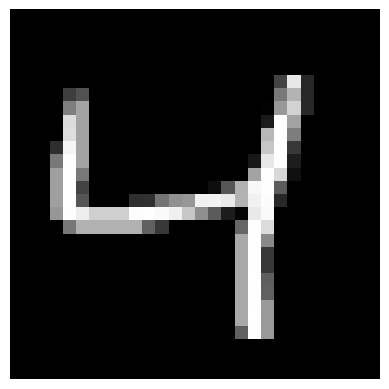

In [4]:
image = train_images[2]

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off the axes
plt.show()

## Reshape images

In [5]:
# Reshape and scale the images
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [6]:
train_images[1].shape

(784,)

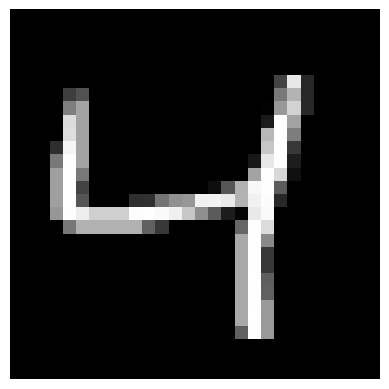

In [7]:
image = train_images[2].reshape(28,28)

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off the axes
plt.show()

# Perform one-hot encoding on the labels

In [8]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

## Q2. Implement a simple feed forward neural network using any deep learning framework/library (e.g.,Tensorflow, PyTorch)

## Q3. Train the neural network on the chosen dataset without using batch normalization.

In [15]:
# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(28 * 28,)),  ## input 28x28 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model without batch normalization
model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])


# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2751 - accuracy: 0.9215
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1024 - accuracy: 0.9694
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0672 - accuracy: 0.9794
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0491 - accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0352 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0268 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0147 - accuracy: 0.9954
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0737 - accuracy: 0.980

## Q4. Implement batch normalization layers in the neural network and train the model again.

In [10]:
# Build the neural network model with BatchNormalization
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(28 * 28,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model batch normalization
model1.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [ ]:
model1.su

In [16]:
# Train the model
history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0092 - accuracy: 0.9973
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0095 - accuracy: 0.9969
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0097 - accuracy: 0.9968
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0077 - accuracy: 0.9976
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0068 - accuracy: 0.9979
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0073 - accuracy: 0.9977
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0065 - accuracy: 0.9981
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0071 - accurac

## Q4. Compare the training and validation performance (e.g., accuracy, loss) between the models with andwithout batch normalization.

In [12]:
# Evaluate the model without normalization
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy of ANN without  Batch normalization: {test_acc}')
print(f'Test loss of ANN without  Batch normalization: {test_loss}')

# Evaluate the model with batch normalization
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f'Test accuracy of ANN with Batch Normalization : {test_acc}')
print(f'Test loss of ANN with Batch normalization: {test_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0867 - accuracy: 0.9786
Test accuracy of ANN without  Batch normalization: 0.978600025177002
Test loss of ANN without  Batch normalization: 0.08667299896478653
313/313 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9779
Test accuracy of ANN with Batch Normalization : 0.9779000282287598
Test loss of ANN with Batch normalization: 0.08186537772417068


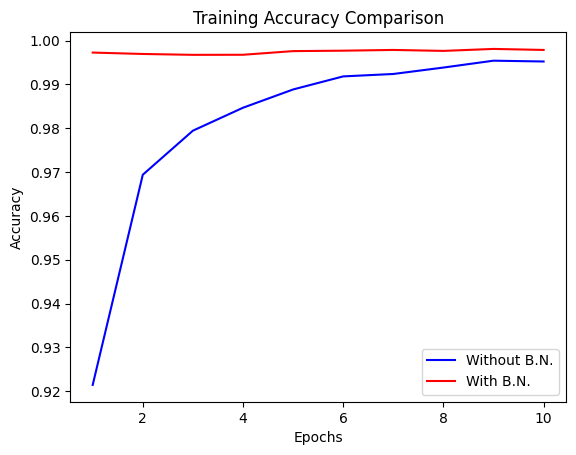

In [24]:
import matplotlib.pyplot as plt

# Access the accuracy values from the training history of both models
accuracy_model = history.history['accuracy']
accuracy_model1 = history1.history['accuracy']

# Plot accuracy
epochs = range(1, len(accuracy_model) + 1)
plt.plot(epochs, accuracy_model, 'b', label='Without B.N.')
plt.plot(epochs, accuracy_model1, 'r', label='With B.N.')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


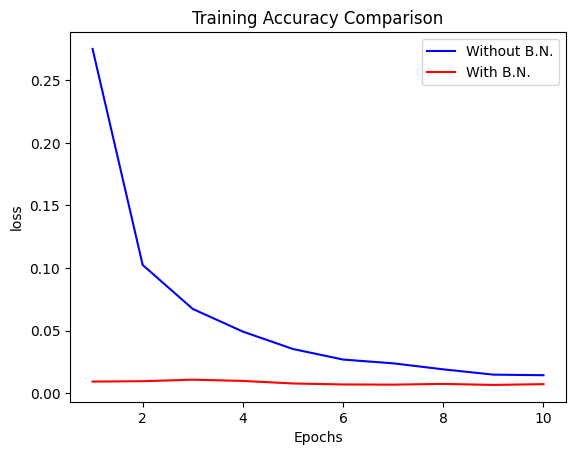

In [25]:
# Access the accuracy values from the training history of both models
accuracy_model = history.history['loss']
accuracy_model1 = history1.history['loss']

# Plot accuracy
epochs = range(1, len(accuracy_model) + 1)
plt.plot(epochs, accuracy_model, 'b', label='Without B.N.')
plt.plot(epochs, accuracy_model1, 'r', label='With B.N.')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Conclusion
####   With Batch Normalization both Loss and Accuracy remain almost constant throughout training but in case of Without Normalizationloss and accuracy convergence to zero and one respectivley.

## Q5. Discuss the impact of batch normalization on the training process and the performance of the neural network.

The provided results show the impact of batch normalization on the performance of an Artificial Neural Network (ANN). Here's how we can interpret the results:

1. `Test Accuracy`:

- `ANN without Batch Normalization`: The test accuracy achieved by the ANN without batch normalization is 0.9786, or 97.86%.
- `ANN with Batch Normalization`: The test accuracy achieved by the ANN with batch normalization is 0.9779, or 97.79%.
- `Interpretation`: Both models perform quite well, achieving high accuracy rates on the test dataset. The model without batch normalization performs slightly better in terms of accuracy, with a difference of 0.0007 or 0.07%.

2. `Test Loss`:

- `ANN without Batch Normalization`: The test loss of the ANN without batch normalization is 0.0867.
- `ANN with Batch Normalization`: The test loss of the ANN with batch normalization is 0.0819.
- `Interpretation`: The test loss represents the amount of error in the predictions made by the model. In this case, the model with batch normalization has a lower test loss, indicating that it has slightly better predictive performance. The difference in test loss between the two models is 0.0048.

Overall, both models perform well, but the model with batch normalization shows a slightly lower test loss, indicating better predictive performance. However, the model without batch normalization has a slightly higher test accuracy. These results suggest that the impact of batch normalization on this specific ANN is relatively small, and the choice of whether to include batch normalization may depend on other factors such as computational efficiency, model complexity, and specific dataset characteristics. It's important to note that these results are specific to this experiment, and the impact of batch normalization can vary depending on the architecture, dataset, and other factors.

# Q3. Experimentation and Anlaysis

## Q1. Experiment with different batch sizes and observe the effect on the training dynamics and model performancer.

Training with batch size: 16
Training with batch size: 32
Training with batch size: 64
Training with batch size: 128


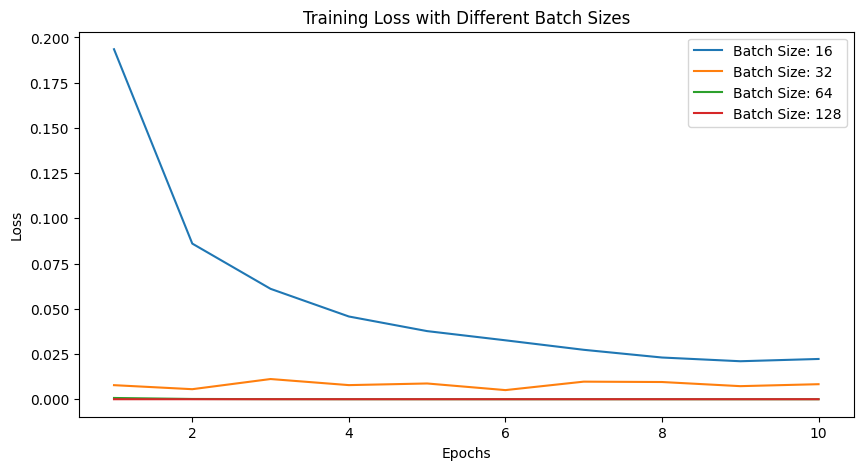

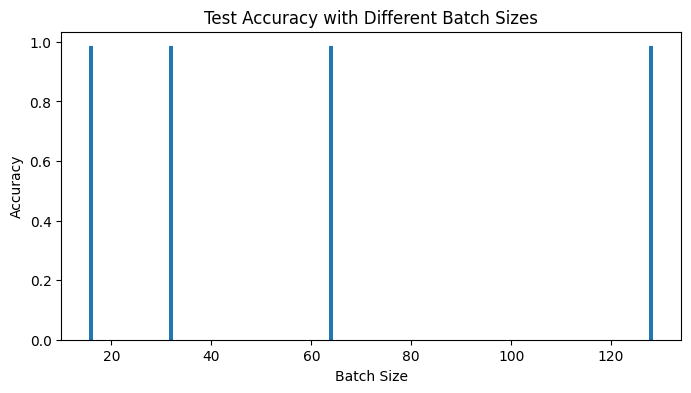

In [35]:
# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(28 * 28,)),  ## input 28x28 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model without batch normalization
model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Define a list of batch sizes to experiment with
batch_sizes = [16, 32, 64, 128]

# Train the model with different batch sizes and collect the training history
history_list = []
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size, verbose=0)
    history_list.append(history)

# Plot the training dynamics for each batch size
plt.figure(figsize=(10, 5))
for i, history in enumerate(history_list):
    batch_size = batch_sizes[i]
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, label=f"Batch Size: {batch_size}")
plt.title('Training Loss with Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model performance on the test dataset with different batch sizes
test_accuracy_list = []
for batch_size in batch_sizes:
    _, test_accuracy = model.evaluate(test_images, test_labels, batch_size=batch_size, verbose=0)
    test_accuracy_list.append(test_accuracy)

# Plot the model performance on the test dataset with different batch sizes
plt.figure(figsize=(8, 4))
plt.bar(batch_sizes, test_accuracy_list)
plt.title('Test Accuracy with Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.show()

## Q2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

Batch normalization offers several advantages in improving the training of neural networks:

1. `Improved Gradient Flow`: Batch normalization helps address the vanishing or exploding gradient problem by normalizing the activations within each mini-batch during training. This normalization reduces the scale of the gradients, making the optimization process more stable and efficient. It allows for better gradient flow through the network, enabling faster convergence.

2. `Stabilizes Network Learning`: Batch normalization helps stabilize the learning process by reducing the sensitivity to the initialization of network parameters. It makes the network less dependent on careful weight initialization or learning rate tuning. This stability enables more robust and consistent training across different architectures and datasets.

3. `Enables Higher Learning Rates`: With batch normalization, higher learning rates can be used during training without risking divergence or instability. This is because batch normalization mitigates the impact of large weight updates by normalizing the activations, ensuring that the network remains within a reasonable range during optimization.

4. `Regularization Effect`: Batch normalization acts as a form of regularization by adding noise to the network activations. It introduces a slight randomness in each mini-batch, which helps prevent overfitting and improves the network's generalization ability.

5. `Reduces Dependency on Dropout`: Batch normalization can reduce the reliance on dropout as a regularization technique. It has been observed that batch normalization can have a similar effect as dropout by introducing noise in the activations and reducing the need for explicit dropout layers. This can simplify the network architecture and improve computational efficiency.

Despite its benefits, batch normalization does have some potential limitations:

1. `Batch Size Sensitivity`: Batch normalization performance can vary with different batch sizes. Smaller batch sizes may lead to higher noise levels in the estimated statistics used for normalization, reducing the effectiveness of batch normalization. However, techniques like running mean and variance estimation can help alleviate this issue.

2. `Inference Dependency`: During inference, the network's inputs may not be available in mini-batches, making it challenging to apply the same normalization technique as during training. Methods such as using the accumulated statistics during training or estimating the statistics from a subset of the test data can be used to address this issue.

3. `Computational Overhead`: Batch normalization introduces additional computations during both training and inference. The normalization process requires calculating mean and variance statistics, as well as performing element-wise scaling and shifting. This can increase the computational overhead, especially for large models and complex architectures.

4. `Dependency on Mini-Batch Statistics`: The effectiveness of batch normalization relies on the assumption that the mini-batch statistics are representative of the entire training or test dataset. In scenarios with highly imbalanced or non-stationary data distributions, batch normalization may not work optimally. Techniques like group normalization and layer normalization can be alternatives in such cases.

Overall, despite these limitations, batch normalization has proven to be an effective technique in improving the training dynamics, convergence, and generalization of neural networks. It has become a standard component in many modern architectures and has contributed to significant advancements in deep learning research and applications.